# Introduction Example for Image Processing 2
### Image segmentation

name: Jorge Garcia

Importamos las librerías 

In [1]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

#### Cargamos la primera imagen.
En la primera imagen, se muestran tres granos de arroz seleccionados de una imagen original con ruido.

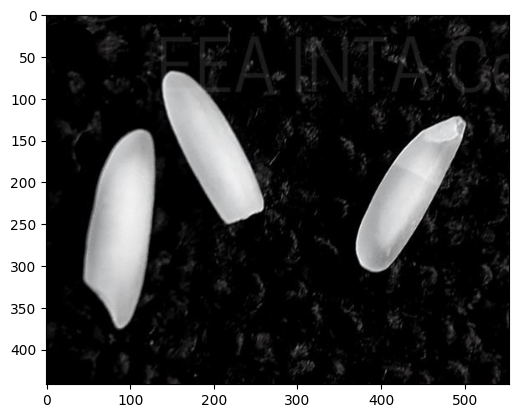

In [2]:
img = imread('3granos.jpg')
plt.imshow(img)
plt.show()

Creamos la función howis para obtener las características de la imagen (tamaño, máximo, mínimo). (Esto ya se encontraba en la parte 1)

In [3]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

howis(img)

size =  (442, 553, 3)
max  =  255
min  =  0


Escogemos uno de los canales RGB (para estos casos el Rojo)

size =  (442, 553)
max  =  255
min  =  0


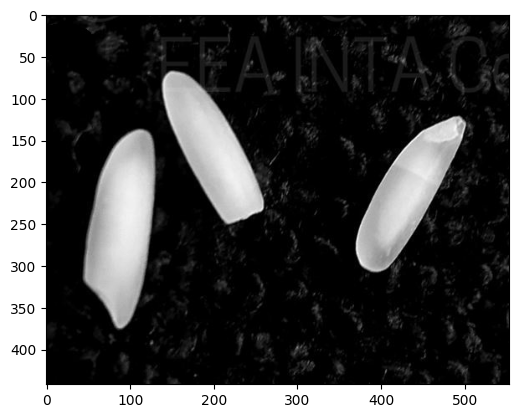

In [4]:
X_red = img[:,:,2]
howis(X_red) #Muestra las dimensiones
plt.imshow(X_red,cmap='gray') #Lo muestra en gris
plt.show()

Esta función fue creada para segmentar una imagen binarizando los píxeles con valores mayores que el umbral. (La misma función de la parte 1)

In [5]:
def segmenta(X,t):
  (N,M) = X.shape #Obtengo las dimensiones de la imagen 
  Y = np.zeros((N,M))
  area = 0
  for i in range(N):
    for j in range(M):
      if X[i,j] > t:
        Y[i,j] = 255
        area = area + 1
  print('area = ',area)
  return Y

Se crea una función para visualizar dos imágenes.

In [6]:
def mostrar_dos_imagenes(imagen1, imagen2, title1='Imagen 1', title2='Imagen 2'):

    # Mostrar las imágenes lado a lado
    plt.figure(figsize=(10, 5))

    # Imagen 1
    plt.subplot(1, 2, 1)
    plt.imshow(imagen1)
    plt.title(title1)
    plt.axis('off')

    # Imagen 2
    plt.subplot(1, 2, 2)
    plt.imshow(imagen2)
    plt.title(title2)
    plt.axis('off')

    # Mostrar el gráfico
    plt.show()

### Comparacion entre las imagenes con Threshold y Segmenta.

area =  35347


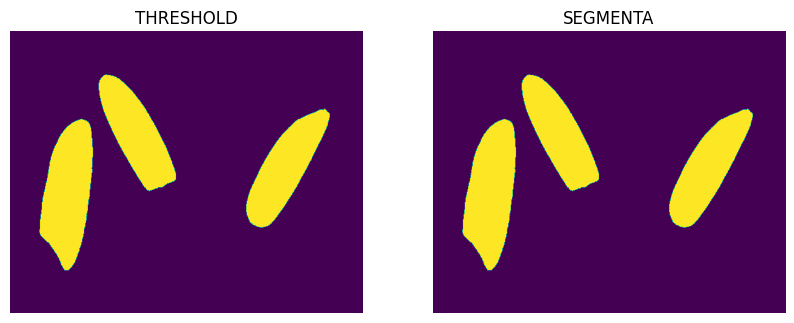

In [7]:
# Define un umbral (ajusta este valor según tus necesidades)
umbral = 132
_, imagen_umbralizada = cv2.threshold(X_red, umbral, 255, cv2.THRESH_BINARY)
imagen_Segmenta = segmenta(X_red,umbral)

mostrar_dos_imagenes(imagen_Segmenta,imagen_umbralizada,title1="THRESHOLD",title2="SEGMENTA")


Es evidente que la función segmenta y la función threshold realizan la misma tarea.

### Escogemos otra imagen con varios granos de arroz. 

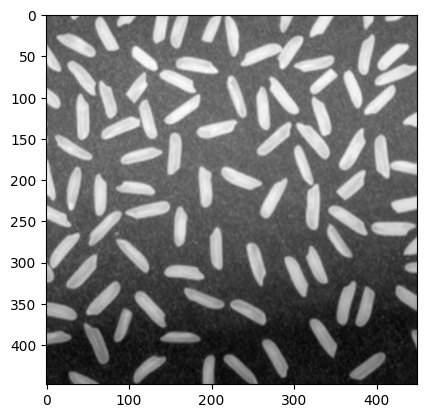

In [8]:
img2 = imread('rices.jpg')
plt.imshow(img2)
plt.show()

size =  (448, 450)
max  =  255
min  =  1


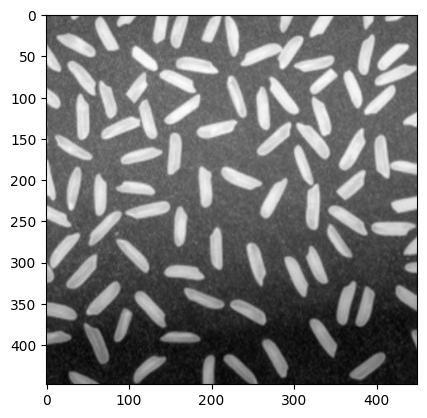

In [9]:
X_red2 = img2[:,:,2]
howis(X_red2) #Muestra las dimensiones
plt.imshow(X_red2,cmap='gray')
plt.show()

El código antiguo y el nuevo están realizando la misma operación, pero el nuevo código utiliza operaciones vectorizadas de NumPy, lo que hace que sea más eficiente y conciso. Ambos códigos están destinados a normalizar cada fila de la matriz X_red2 restando el valor mínimo de cada fila.

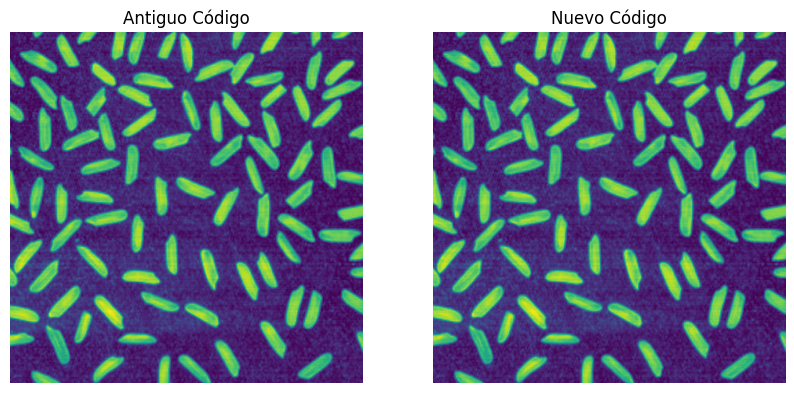

In [10]:
#Antiguo código 
(N,M) = X_red2.shape
Xm    = np.zeros((N,M),np.uint8)
for i in range(N):
  xmin = np.min(X_red2[i,:])
  Xm[i,:] = X_red2[i,:] - xmin

#Nuevo código -----
# Calcular el mínimo a lo largo de cada fila
xmin2 = np.min(X_red2, axis=1, keepdims=True)
Xm2 = X_red2 - xmin2

mostrar_dos_imagenes(Xm,Xm2,title1="Antiguo Código",title2="Nuevo Código")

area =  48988


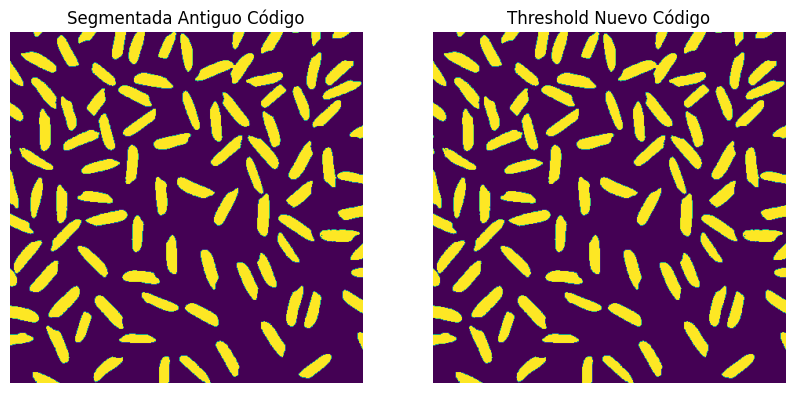

In [11]:
umbral = 100
Y2 = segmenta(Xm,umbral) # segmentamos la imagen donde threshold is 122
_, imagen_umbralizada = cv2.threshold(Xm2, umbral, 255, cv2.THRESH_BINARY)
mostrar_dos_imagenes(Y2,imagen_umbralizada,"Segmentada Antiguo Código","Threshold Nuevo Código")


### Imágenes de unas nubes

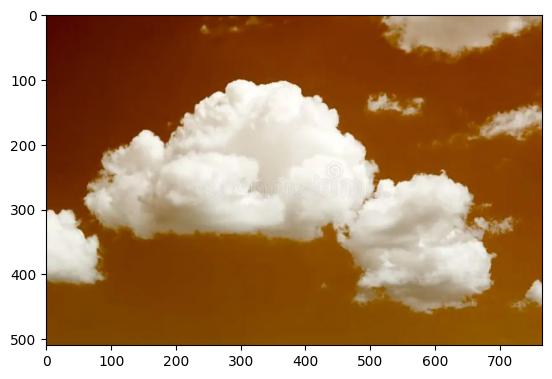

In [12]:
img3 = imread('Nubes.jpg')
plt.imshow(img3,cmap='viridis')
plt.show()

In [13]:
def mostrar_tres_imagenes(img1, img2, img3, title1='Imagen 1', title2='Imagen 2', title3='Imagen 3'):
    # Crear una figura con tres subgráficos
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Configurar el primer subgráfico
    axs[0].imshow(img1)
    axs[0].set_title(title1)
    axs[0].axis('off')

    # Configurar el segundo subgráfico
    axs[1].imshow(img2)
    axs[1].set_title(title2)
    axs[1].axis('off')

    # Configurar el tercer subgráfico
    axs[2].imshow(img3)
    axs[2].set_title(title3)
    axs[2].axis('off')

    # Mostrar la figura
    plt.show()

Se usa una técnica útil para comprender cómo se distribuyen los colores en una imagen y puede ser útil en procesos de ajuste de color, análisis de canales específicos o para evaluar la información de color en una imagen.

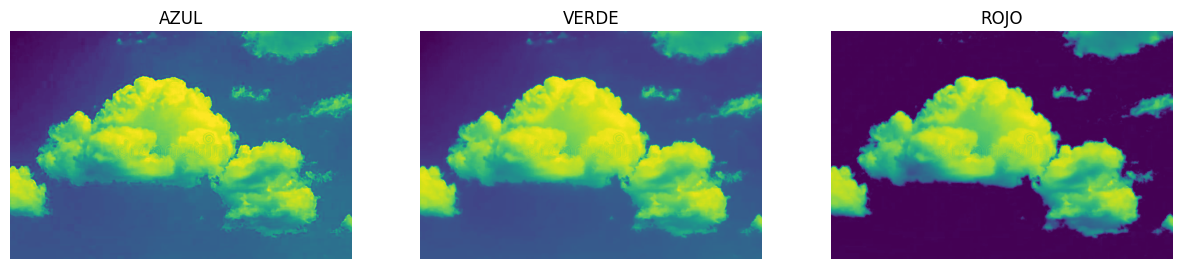

In [14]:
img_azul = img3[:,:,0]
img_verde = img3[:,:,1]
img_rojo = img3[:,:,2]

mostrar_tres_imagenes(img_azul,img_verde,img_rojo,title1="AZUL",title2="VERDE",title3="ROJO")

area =  136814


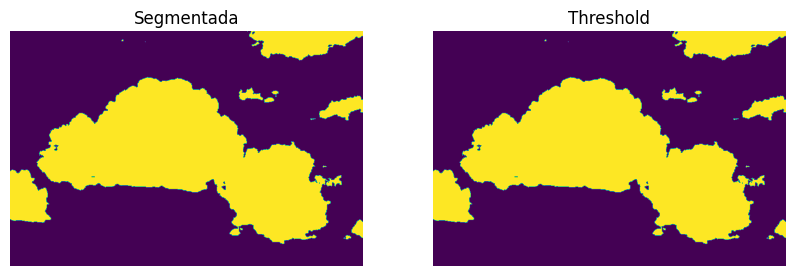

In [15]:
umbral = 64
Y2 = segmenta(img_rojo,umbral) # 
_, imagen_umbralizada = cv2.threshold(img_rojo, umbral, 255, cv2.THRESH_BINARY)

mostrar_dos_imagenes(Y2,imagen_umbralizada,"Segmentada","Threshold")


Se puede observa que existe pequeños puntos que fuera de la nube, vamos a quitarlas realizando una apertura, la cual es una operación que suaviza y separa objetos en una imagen. Se realiza mediante la erosión (reducción de contornos) seguida de la dilatación (expansión de contornos). Esta operación es útil para eliminar ruido y preparar imágenes para análisis.

In [16]:
def aplicar_apertura(imagen, tamano_elemento_estructurante=5):
    # Definir el elemento estructurante (kernel) en forma de círculo
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (tamano_elemento_estructurante, tamano_elemento_estructurante))

    # Aplicar la operación de apertura
    imagen_apertura = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)

    return imagen_apertura

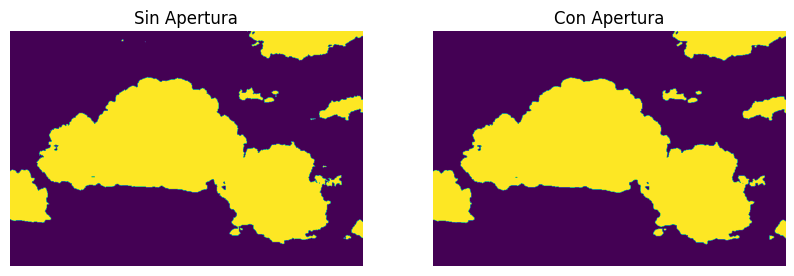

In [17]:
img_apertura = aplicar_apertura(imagen_umbralizada,4)
mostrar_dos_imagenes(Y2,img_apertura,"Sin Apertura","Con Apertura")

Estos puntos han desaparecido, lo que permite una mejor visualización de las nubes más relevantes.

Para dar un poco mas de detalle se resalta ciertos elementos (donde la imagen en escala de grises resultante de la apertura es mayor que 0) en la imagen original (img3) mostrándolos en color celeste.

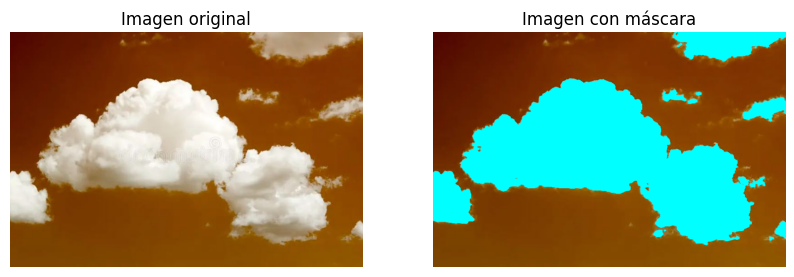

In [18]:
pict_color = cv2.cvtColor(img_apertura, cv2.COLOR_GRAY2BGR)
mascara = pict_color > 0
resultado = np.where(mascara, [0, 255, 255], img3)

mostrar_dos_imagenes(img3,resultado,title1="Imagen original",title2="Imagen con máscara")
